In [34]:
import numpy as np

In [35]:
X = np.array([[18], [23], [28], [33], [38], [43], [48], [53], [58], [63]])
y = np.array([[871], [1132], [1042], [1356], [1488], [1638], [1569], [1754], [1866], [1900]])

In [36]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [37]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)
y

array([[-1.75751985],
       [-0.98083058],
       [-1.24865447],
       [-0.31424669],
       [ 0.07856167],
       [ 0.52493481],
       [ 0.31960317],
       [ 0.87013004],
       [ 1.20342199],
       [ 1.3045999 ]])

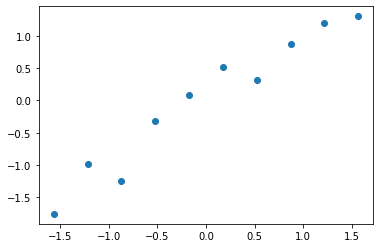

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)

In [39]:
# Formula da regressão linear simples
# y = b0 + b1 * x

In [40]:
# O seed() serve para não alterar o valor aleatório gerado
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [41]:
import tensorflow

In [42]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [43]:
b0 = tf.Variable(0.54)
b1 = tf.Variable(0.71)

In [44]:
# Com o conceito MSE vamos pegar o tamanho do erro das variáveis
erro = tf.losses.mean_squared_error(y, (b0 + b1 * X))
# Usa a descida do gradiente para ajuste dos valores b0 e b1
optmizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
# Treinamento para minimizar o erro
training = optmizer.minimize(erro)
init = tf.global_variables_initializer()

In [45]:
with tf.Session() as sess:
    sess.run(init)
    # print(sess.run(b0), '\n')
    # print(sess.run(b1))
    for i in range(1000):
        sess.run(training)
    b0_final, b1_final = sess.run([b0, b1])

In [46]:
b0_final

0.07293496

In [47]:
b1_final

0.9359134

In [48]:
predictions = b0_final + b1_final * X
predictions

array([[-1.39335951],
       [-1.06751629],
       [-0.74167308],
       [-0.41582986],
       [-0.08998665],
       [ 0.23585657],
       [ 0.56169979],
       [ 0.887543  ],
       [ 1.21338622],
       [ 1.53922944]])

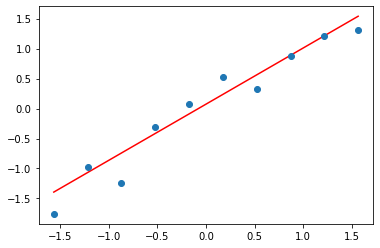

In [49]:
plt.plot(X, predictions, color='red')
plt.plot(X, y, 'o')

In [80]:
scaler_x.transform(np.array([[40]]))

array([[0.]])

In [81]:
prediction1 = scaler_y.inverse_transform(b0_final + b1_final * scaler_x.transform(np.array([[40]])))
prediction1

array([[1486.10919061]])

In [82]:
y1 = scaler_y.inverse_transform(y)
y1

array([[ 871.],
       [1132.],
       [1042.],
       [1356.],
       [1488.],
       [1638.],
       [1569.],
       [1754.],
       [1866.],
       [1900.]])

In [83]:
predicition2 = scaler_y.inverse_transform(predictions)
predicition2

array([[ 993.37306876],
       [1102.86998473],
       [1212.3669007 ],
       [1321.86381666],
       [1431.36073263],
       [1540.8576486 ],
       [1650.35456456],
       [1759.85148053],
       [1869.3483965 ],
       [1978.84531246]])

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y1, predicition2)
mse = mean_squared_error(y1, predicition2)

In [85]:
mae

67.9187540892004

In [86]:
mse

7153.912871448908